# Machine Learning: Session 2

## Regression, regularization and cross-validation

In this task you will experiment with linear regression and see what happens when we use regularized versions of it. More precisely, you will try out Ridge and Lasso regularization. In addition, we will see how using cross-validation helps us to get more stable estimates for our performance.

Read in the data in **data.csv** and split it into training (50%) and testing (50%) set. Use random seed 0 (train_test_split method).

In [1]:
import pandas as pd
import sklearn
import numpy as np
from sklearn.linear_model import LinearRegression
CRED = '\033[91m'
CEND = '\033[0m'

data = pd.read_csv("data.csv", index_col = 0)

## Task 1. Multivariate linear regression (1 point)

#### <font color='purple'>(a) Implement the fitting procedure of non-regularized multivariate ordinary least squares linear regression, as presented in the lecture slides (matrix operations). Fit on the training data and save the coefficients and the intercept for use in subtask (1c). Print out the coefficients corresponding to the five first features.

In [ ]:
##### YOUR CODE STARTS ##### (please do not delete this line)

In [2]:
X = data.iloc[:, 0:-1].values
y = data.iloc[:, -1].values

In [5]:
# Add bias term
X = np.hstack((np.ones((X.shape[0], 1)), X))

In [8]:
X_transpose = np.transpose(X)

In [9]:
beta = np.linalg.inv(X_transpose.dot(X)).dot(X_transpose).dot(y)

In [10]:
intercept = beta[0]
intercept

0.09150789312844954

In [11]:
first_five_my_ols_coefficients = beta[1:6]

In [ ]:
##### YOUR CODE ENDS ##### (please do not delete this line)

In [13]:
print('Coefficients of five first features according to my OLS implementation:', first_five_my_ols_coefficients)

Coefficients of five first features according to my OLS implementation: [9.84554247 8.95322205 8.02675256 6.77008031 5.89850726]


#### <font color='purple'>(b) Call out the `sklearn.linear_model.LinearRegression` learning algorithm from the sklearn package. Fit the model on the training data and save it for use in the following subtasks. Print out the coefficients corresponding to the five first features.

In [ ]:
##### YOUR CODE STARTS ##### (please do not delete this line)

In [30]:
lr = LinearRegression()
lr.fit(data.iloc[:, 0:-1], data.iloc[:, -1])

LinearRegression()

In [31]:
first_five_sklearn_ols_coefficients = lr.coef_[0:5]

In [ ]:
##### YOUR CODE ENDS ##### (please do not delete this line)

In [32]:
print('Coefficients of five first features according to sklearn OLS implementation:', first_five_sklearn_ols_coefficients)

Coefficients of five first features according to sklearn OLS implementation: [9.84554247 8.95322205 8.02675256 6.77008031 5.89850726]


#### <font color='purple'>(c) Demonstrate that the methods of subtasks (1a) and (1b) give the same results by showing that they find the same coefficients and intercept. </font>

You maybe won't get exactly the same results because of precision problems of floats so the idea is to compare if the values are equal up to some precision (e.g. check if the difference is less than 0.000001). If for some reason you are not able to get the assertions to pass with the given precision then please change the precision such that the assertions would pass.

In [33]:
try:
    ##### YOUR CODE STARTS ##### (please do not delete this line)
    my_intercept = intercept
    my_coefficients = beta[1:]
    sklearn_intercept = lr.intercept_
    sklearn_coefficients = lr.coef_
    precision = 0.000001
    ##### YOUR CODE ENDS ##### (please do not delete this line)
    assert(abs(my_intercept - sklearn_intercept) < precision)
    for i in range(99):
        assert(abs(my_coefficients[i] - sklearn_coefficients[i]) < precision)
    print('The assertions have passed with precision:',precision)
except NotImplementedError as e:
    print(CRED, "TODO:", e, CEND)

The assertions have passed with precision: 1e-06


#### <font color='purple'>(d) Using the sklearn model from subtask (1b) predict the results on the training and testing set and calculate and show the root mean square errors (RMSE). Since you need to do the same evaluation in future tasks also, please implement a function 'evaluate' for this.

In [35]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [34]:
new_x = data.drop('y', axis=1)
new_y = data['y']

In [37]:
print(new_x.shape)
print(new_y.shape)

(200, 99)
(200,)


In [63]:
def evaluate(regression_model_class_instance, trainX, trainY, testX, testY):
    # print("\n#################\n")
    # print(regression_model_class_instance, '\n')
    
    ##### YOUR CODE STARTS ##### (please do not delete this line)
    # raise NotImplementedError("Implement RMSE for train and test sets.")
    train_predictions = regression_model_class_instance.predict(trainX)
    test_predictions = regression_model_class_instance.predict(testX)
    rmse_tr = np.sqrt(mean_squared_error(trainY, train_predictions))
    rmse_te = np.sqrt(mean_squared_error(testY, test_predictions))
    ##### YOUR CODE ENDS ##### (please do not delete this line)
    # print("RMSE train:", rmse_tr)
    # print("RMSE test:", rmse_te)
    
    return rmse_tr, rmse_te

try:
    ##### YOUR CODE STARTS ##### (please do not delete this line)
    trainX, testX, trainY, testY = train_test_split(new_x, new_y, test_size=0.2, random_state=42)
    evaluate(lr, trainX, trainY, testX, testY)
    ##### YOUR CODE ENDS ##### (please do not delete this line)
except NotImplementedError as e:
    print(CRED, "TODO:", e, CEND)

## Task 2. Ridge & Lambda regularized regression  (1 point)

This blogpost might clarify regularization a bit: https://towardsdatascience.com/l1-and-l2-regularization-methods-ce25e7fc831c

Intuition behind the regularization: https://towardsdatascience.com/intuitions-on-l1-and-l2-regularisation-235f2db4c261

#### <font color='purple'>(a) Implement the fitting procedure of ridge regression, as presented in the lecture slides (matrix operations). Fit on the training data with regularization parameter equal to 1 and save the coefficients and the intercept for use in subtask (2c). Print out the coefficients corresponding to the five first features.

In [ ]:
##### YOUR CODE STARTS ##### (please do not delete this line)

In [37]:
lambda_ = 1 * np.identity(X.shape[1]) 


ridge_beta = np.linalg.inv(X.T @ X + lambda_) @ X.T @ y 

In [38]:
first_five_my_ridge_coefficients = ridge_beta[1:6]

In [ ]:
##### YOUR CODE ENDS ##### (please do not delete this line)

In [39]:
print('Coefficients of five first features according to my ridge implementation:', first_five_my_ridge_coefficients)

Coefficients of five first features according to my ridge implementation: [9.60239357 8.77342275 7.82764174 6.56760406 5.71856829]


#### <font color='purple'>(b) Call out the `sklearn.linear_model.Ridge` learning algorithm from the sklearn package. Fit the model on the training data with regularization parameter equal to 1 and save it for use in the following subtasks. Print out the coefficients corresponding to the five first features.</font>

Use parameters `solver = "cholesky", tol = 0.000000000001` in order to get more similar results to your own implementation. The default parameter for the regularization is already 1 so no need to specify that. The parameters `solver` and `tol` are necessary to force sklearn to use closed-form solution. Otherwise it would use numerical optimization which would give more different results from yours. **In the future tasks, please use the default option and don't force it to use the closed-form solution (numerical will be faster!).**

In [ ]:
##### YOUR CODE STARTS ##### (please do not delete this line)

In [40]:
from sklearn.linear_model import Ridge

In [41]:
ridge_model = Ridge(solver="cholesky", tol=1e-12)

In [42]:
ridge_model.fit(data.iloc[:, 0:-1], data.iloc[:, -1])

Ridge(solver='cholesky', tol=1e-12)

In [43]:
first_five_sklearn_ridge_coefficients = ridge_model.coef_[:5]

In [44]:
##### YOUR CODE ENDS ##### (please do not delete this line)

In [45]:
print('Coefficients of five first features according to my ridge implementation:', first_five_sklearn_ridge_coefficients)

Coefficients of five first features according to my ridge implementation: [9.60236257 8.77353545 7.82760677 6.56754791 5.71832136]


#### <font color='purple'>(c) Demonstrate the correctess of your implementation the same way as in the previous exercise. For this compare your coefficients and intercept as obtained in subtask (2a) with the coeffiecients and intercept from sklearn, as obtained in subtask (2b). The results can actually vary quite a bit due to implementation differences in matrix operations. Compare that the differences in results (coefficients and intercept) are less than 0.02. If for some reason you are not able to get the assertions to pass with the given precision then please change the precision such that the assertions would pass.

In [46]:
try:
    ##### YOUR CODE STARTS ##### (please do not delete this line)
    # raise NotImplementedError("Please assign intercepts and coefficients to the given variables.")
    my_ridge_intercept = ridge_beta[0]  
    my_ridge_coefficients = ridge_beta[1:]
    sklearn_ridge_intercept = ridge_model.intercept_
    sklearn_ridge_coefficients = ridge_model.coef_
    precision = 0.02
    ##### YOUR CODE ENDS ##### (please do not delete this line)
    assert(abs(my_ridge_intercept - sklearn_ridge_intercept) < precision)
    for i in range(99):
        assert(abs(my_ridge_coefficients[i] - sklearn_ridge_coefficients[i]) < precision)
    print('The assertions have passed with precision:',precision)
except NotImplementedError as e:
    print(CRED, "TODO:", e, CEND)

The assertions have passed with precision: 0.02


#### <font color='purple'>(d) Train a Lasso model using the sklearn package (use the default regularization parameter) and save it for future use. Print out the coefficients corresponding to the five first features.</font>

In [ ]:
##### YOUR CODE STARTS ##### (please do not delete this line)

In [47]:
from sklearn.linear_model import Lasso
lasso_model = Lasso()
lasso_model.fit(data.iloc[:, 0:-1], data.iloc[:, -1])

Lasso()

In [48]:
first_five_sklearn_lasso_coefficients = lasso_model.coef_[:5]

In [ ]:
##### YOUR CODE ENDS ##### (please do not delete this line)

In [49]:
print('Coefficients of five first features according to sklearn lasso implementation:', first_five_sklearn_lasso_coefficients)

Coefficients of five first features according to sklearn lasso implementation: [7.02665612 6.09152637 4.98626705 2.96570665 2.51931476]


#### <font color='purple'>(e) Evaluate the sklearn Ridge and Lasso models on the training and testing set and calculate and show the RMSE, using the function 'evaluate' from subtask (1d).

In [50]:
try:
    print('Evaluation of sklearn ridge regression model:')
    ##### YOUR CODE STARTS ##### (please do not delete this line)
    evaluate(ridge_model, trainX, trainY, testX, testY)
    ##### YOUR CODE ENDS ##### (please do not delete this line)
    
    print('Evaluation of sklearn lasso regression model:')
    ##### YOUR CODE STARTS ##### (please do not delete this line)
    evaluate(lasso_model, trainX, trainY, testX, testY)
    ##### YOUR CODE ENDS ##### (please do not delete this line)
except NotImplementedError as e:
    print(CRED, "TODO:", e, CEND)

Evaluation of sklearn ridge regression model:

#################

Ridge(solver='cholesky', tol=1e-12) 

RMSE train: 0.45491745234764813
RMSE test: 0.49962673236674626
Evaluation of sklearn lasso regression model:

#################

Lasso() 

RMSE train: 4.972277495567842
RMSE test: 5.397790289450367


## Task 3. Choosing a suitable regularization parameter  (1 point)

Since different parameters can lead to very different results we need to do some parameter tuning and find a suitable regularization parameter for both Ridge and Lasso. We could try out different values and see which ones lead to the best results on the test set. However, then we would overfit to our test data and we would not have an adequate estimate of how good the model is in the end. That is why we need to do parameter tuning only using the training set.

Use **alphas = np.linspace(0.01, 10, 100)** for Ridge and **alphas = np.linspace(0.01, 5, 100)** for Lasso. The method generates 100 values with equal steps between the first and second parameter.

#### <font color='purple'>(a) **Method 1:** Divide the training set into training and validation set using 90%/10% split and a random seed 0 (train_test_split method). Train Ridge and Lasso models with different alpha values on the training set and calculate the RMSE values on the validation set. Choose and report the alpha that has the best RMSE for Ridge and another alpha that has the best RMSE for Lasso (save both alpha and RMSE values).

In [67]:
def method_1(model, alphas, random_seed):
    ##### YOUR CODE STARTS ##### (please do not delete this line)
    # raise NotImplementedError("Calculate RMSE for Ridge and Lasso models.")

    # init
    best_alpha = None
    best_rmse = float("inf")
    # spliting
    trainX, valX, trainY, valY = train_test_split(
        data.drop("y", axis=1), data["y"], test_size=0.1, random_state=random_seed
    )
    # searching
    for alpha in alphas:
        lr = model(alpha=alpha)
        lr.fit(trainX, trainY)
        _, rmse = evaluate(lr, trainX, trainY, valX, valY)

        if rmse < best_rmse:
            best_rmse = rmse
            best_alpha = alpha
    ##### YOUR CODE ENDS ##### (please do not delete this line)
    print(f"model is {model.__name__}, best alpha is {best_alpha}, best rmse is {best_rmse}\n")
    return best_alpha, best_rmse


ridge_alphas = np.linspace(0.01, 10, 100)
lasso_alphas = np.linspace(0.01, 5, 100)
try:
    ##### YOUR CODE STARTS ##### (please do not delete this line)
    method_1(Ridge, ridge_alphas, 0)  ## ridge
    method_1(Lasso, lasso_alphas, 0)  ## lasso
    ##### YOUR CODE ENDS ##### (please do not delete this line)
except NotImplementedError as e:
    print(CRED, "TODO:", e, CEND)

model is Ridge, best alpha is 0.01, best rmse is 0.8722305088261003

model is Lasso, best alpha is 0.01, best rmse is 0.7491922102868781



#### <font color='purple'>(b) **Method 2:** Instead of doing only one training/validation split, use 10-fold cross validation. For each alpha value calculate the validation errors for each of the folds and average the results. Then choose and report the alpha that has the best RMSE for Ridge and another alpha that has best RMSE for Lasso (save both alpha and RMSE values). For doing the 10-fold split use the sklearn method KFold (kf = KFold(n_splits=10, random_state = 0, shuffle = True)). To see more about how to iterate through the folds see the documentation for the method.

In [52]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, mean_squared_error

In [59]:
def method_2(model, alphas, random_seed):
    ##### YOUR CODE STARTS ##### (please do not delete this line)
    # raise NotImplementedError("Implement 10-fold cross-validation.")
    # init
    best_alpha = None
    best_rmse = float("inf")
    kf = KFold(n_splits=10, random_state=random_seed, shuffle=True)
    for alpha in alphas:
        lr = model(alpha=alpha)
        fold_rmse = []
        neg_mse_scores = cross_val_score(
            lr, trainX, trainY, cv=kf, scoring="neg_root_mean_squared_error"
        )
        avg_rmse = np.mean(neg_mse_scores) * -1

        # Update best alpha if this alpha gives a better average RMSE
        if avg_rmse < best_rmse:
            best_rmse = avg_rmse
            best_alpha = alpha
    print(f"model is {model.__name__}, best alpha is {best_alpha}, best rmse is {best_rmse}\n")
    return best_alpha, best_rmse


try:
    ##### YOUR CODE STARTS ##### (please do not delete this line)
    method_2(Ridge, ridge_alphas, 0)  ## ridge
    method_2(Lasso, lasso_alphas, 0)  ## lasso
    ##### YOUR CODE ENDS ##### (please do not delete this line)
except NotImplementedError as e:
    print(CRED, "TODO:", e, CEND)

model is Ridge, best alpha is 0.21181818181818182, best rmse is 0.9228954338856216

model is Lasso, best alpha is 0.01, best rmse is 0.6708843504292148



## Task 4. Comparing the stability of Method 1 and Method 2  (1 point)

#### <font color='purple'>(a) Run Method 1 and Method 2 both 10 times, every time using a different value 0,1,2,...,9 as the random_state. Report the best alpha and RMSE for both parameter tuning methods and for both regularization methods for each of the 10 trials.

In [ ]:
##### YOUR CODE STARTS ##### (please do not delete this line)

In [76]:
for random_state in range(10):
    print(f"Random State: {random_state}")
    
    print("\nMethod 1 (Single split):")
    # Ridge (Method 1)
    best_alpha_ridge_1, best_rmse_ridge_1 = method_1(Ridge, ridge_alphas, random_state)
    log_results("Method 1", "Ridge", best_alpha_ridge_1, best_rmse_ridge_1)    
    # Lasso (Method 1)
    best_alpha_lasso_1, best_rmse_lasso_1 = method_1(Lasso, lasso_alphas, random_state)
    # print(f"Lasso - Best Alpha: {best_alpha_lasso_1}, Best RMSE: {best_rmse_lasso_1}")
    log_results("Method 1", "Lasso", best_alpha_lasso_1, best_rmse_lasso_1)
    print("\nMethod 2 (10-fold CV):")
    # Ridge (Method 2)
    best_alpha_ridge_2, best_rmse_ridge_2 = method_2(Ridge, ridge_alphas, random_state)
    # print(f"Ridge - Best Alpha: {best_alpha_ridge_2}, Best RMSE: {best_rmse_ridge_2}")
    log_results("Method 2", "Ridge", best_alpha_ridge_2, best_rmse_ridge_2)
    # Lasso (Method 2)
    best_alpha_lasso_2, best_rmse_lasso_2 = method_2(Lasso, lasso_alphas, random_state)
    log_results("Method 2", "Lasso", best_alpha_lasso_2, best_rmse_lasso_2)
        
    print("\n" + "="*50 + "\n")

Random State: 0

Method 1 (Single split):
model is Ridge, best alpha is 0.01, best rmse is 0.8722305088261003



C:\Users\Hassaan\AppData\Local\Temp\ipykernel_38648\425521171.py:15: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  log_df = pd.concat([log_df, new_row], ignore_index=True)


model is Lasso, best alpha is 0.01, best rmse is 0.7491922102868781


Method 2 (10-fold CV):
model is Ridge, best alpha is 0.21181818181818182, best rmse is 0.9228954338856216

model is Lasso, best alpha is 0.01, best rmse is 0.6708843504292148



Random State: 1

Method 1 (Single split):
model is Ridge, best alpha is 0.31272727272727274, best rmse is 0.8493993642285144

model is Lasso, best alpha is 0.01, best rmse is 0.552961985256249


Method 2 (10-fold CV):
model is Ridge, best alpha is 0.1109090909090909, best rmse is 1.012934805691399

model is Lasso, best alpha is 0.01, best rmse is 0.6828703902293913



Random State: 2

Method 1 (Single split):
model is Ridge, best alpha is 0.01, best rmse is 0.8627615739579654

model is Lasso, best alpha is 0.06040404040404041, best rmse is 0.6503843246168566


Method 2 (10-fold CV):
model is Ridge, best alpha is 0.1109090909090909, best rmse is 0.9539999644994704

model is Lasso, best alpha is 0.01, best rmse is 0.6952628755893986



Random S

In [75]:
log_df = pd.DataFrame(columns=["Method", "Model Name", "Alpha", "RMSE"])


def log_results(method, model_name, alpha, rmse):
    global log_df
    new_row = pd.DataFrame(
        {
            "Method": [method],
            "Model Name": [model_name],
            "Alpha": [alpha],
            "RMSE": [rmse],
        }
    )

    log_df = pd.concat([log_df, new_row], ignore_index=True)

In [83]:
# display(log_df[log_df['Model Name'] == 'Ridge'])
# display(log_df[log_df['Model Name'] == 'Lasso'])
display(log_df[log_df['Method'] == 'Method 1'])
display(log_df[log_df['Method'] == 'Method 2'])

,Method,Model Name,Alpha,RMSE
0,Method 1,Ridge,0.010000,0.872231
1,Method 1,Lasso,0.010000,0.749192
4,Method 1,Ridge,0.312727,0.849399
5,Method 1,Lasso,0.010000,0.552962
8,Method 1,Ridge,0.010000,0.862762
9,Method 1,Lasso,0.060404,0.650384
12,Method 1,Ridge,0.211818,0.947495
13,Method 1,Lasso,0.010000,0.688056
16,Method 1,Ridge,0.413636,0.740884
17,Method 1,Lasso,0.010000,0.682129


,Method,Model Name,Alpha,RMSE
2,Method 2,Ridge,0.211818,0.922895
3,Method 2,Lasso,0.010000,0.670884
6,Method 2,Ridge,0.110909,1.012935
7,Method 2,Lasso,0.010000,0.682870
10,Method 2,Ridge,0.110909,0.954000
11,Method 2,Lasso,0.010000,0.695263
14,Method 2,Ridge,0.211818,0.988549
15,Method 2,Lasso,0.010000,0.697015
18,Method 2,Ridge,0.211818,0.977109
19,Method 2,Lasso,0.010000,0.690312


In [95]:
rmse_std_mehtod1 = log_df[log_df['Method'] == 'Method 1']['RMSE'].std()
rmse_std_mehtod2 = log_df[log_df['Method'] == 'Method 2']['RMSE'].std()

In [96]:
print(f"std for method 1 {rmse_std_mehtod1}")
print(f"std for method 2 {rmse_std_mehtod2}")

std for method 1 0.12352578328561434
std for method 2 0.14510868427031634


In [92]:
display(log_df[log_df['Model Name'] == "Ridge"].sort_values(by="RMSE").iloc[0])
print('='*23)
display(log_df[log_df['Model Name'] == "Lasso"].sort_values(by="RMSE").iloc[0])

Method        Method 1
Model Name       Ridge
Alpha         0.817273
RMSE          0.648045
Name: 32, dtype: object

Method        Method 1
Model Name       Lasso
Alpha             0.01
RMSE          0.552962
Name: 5, dtype: object

In [ ]:
##### YOUR CODE ENDS ##### (please do not delete this line)

#### <font color='purple'>(b) What can you say about the stability of the methods? Which one gives more stable information about which alpha to use? Which alpha values turn out to be best in the end for these data?

**Answer:** by using statical methods analysis like standard deviation for RMSE, I think method 1 mroe stable because it have lower standard deviation from method 2. And less variability indicates more stability 

#### <font color='purple'>(c) Create two plots (one for Ridge and one for Lasso) where on each plot there are two boxplots - one for showing the distribution of the RMSE values for the 10 trials for Method 1 and the other for Method 2.

In [ ]:
##### YOUR CODE STARTS ##### (please do not delete this line)

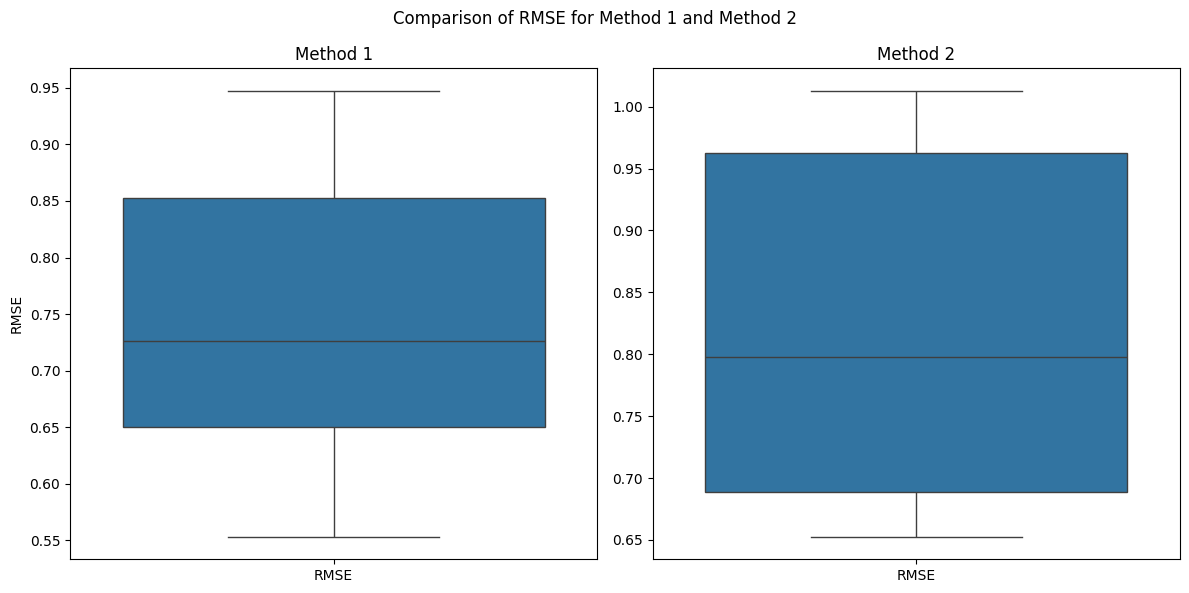

In [112]:
import matplotlib.pyplot as plt
import seaborn as sns

method_1_rmse = log_df[log_df["Method"] == "Method 1"]["RMSE"]
method_2_rmse = log_df[log_df["Method"] == "Method 2"]["RMSE"]

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

sns.boxplot(data=[method_1_rmse], ax=axes[0])
axes[0].set_title("Method 1")
axes[0].set_ylabel("RMSE")

sns.boxplot(data=[method_2_rmse], ax=axes[1])
axes[1].set_title("Method 2")

# Set the overall title
fig.suptitle("Comparison of RMSE for Method 1 and Method 2")

# Show the plot
plt.tight_layout()
plt.show()

In [ ]:
##### YOUR CODE ENDS ##### (please do not delete this line)

#### <font color='purple'>(d) Comment on why the results look like they do? In general, when tuning parameters, is it better to use one training-validation split or K-fold cross-validation? Why?

**Answer:** 
##### Method 1:
- The distribution of RMSE values shows less variance, becasue the performance of the model on different random splits has been relatively consistent.
##### Method 2:
- The distribution of RMSE values have a wider distribution, becasue the variance in performance across the 10 folds.
---
K-fold is a very powerful technique, but I don't know why there is a performance issue in this experiment. In general, I think when you try optimize a variable you should make other variables stable and known as can measure the optimization accurately. So you shouldn't use K-fold techinque in tuning.

## Task 5. Regularization parameter effect on the coefficients  (1 point)

#### <font color='purple'>(a) The regularization parameter influences the values of the coefficients. Create two plots (one for Ridge and one for Lasso) that have the regularization parameter on the x-axis and coefficient values on the y-axis. You don't have to take all 99 values, you can take for example the first 20. Show each coefficient as a line (on the same plot) and comment on what happens when the regularization parameter increases. </font>

In [ ]:
##### YOUR CODE STARTS ##### (please do not delete this line)

In [113]:
alphas = np.logspace(-4, 2, 50)

In [114]:
ridge_coefs = []

for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    ridge.fit(data.iloc[:, 0:-1], data.iloc[:, -1])
    ridge_coefs.append(ridge.coef_[:20])  # Taking only the first 20 coefficients

In [115]:
lasso_coefs = []

for alpha in alphas:
    lasso = Lasso(alpha=alpha, max_iter=10000)
    lasso.fit(data.iloc[:, 0:-1], data.iloc[:, -1])
    lasso_coefs.append(lasso.coef_[:20])  

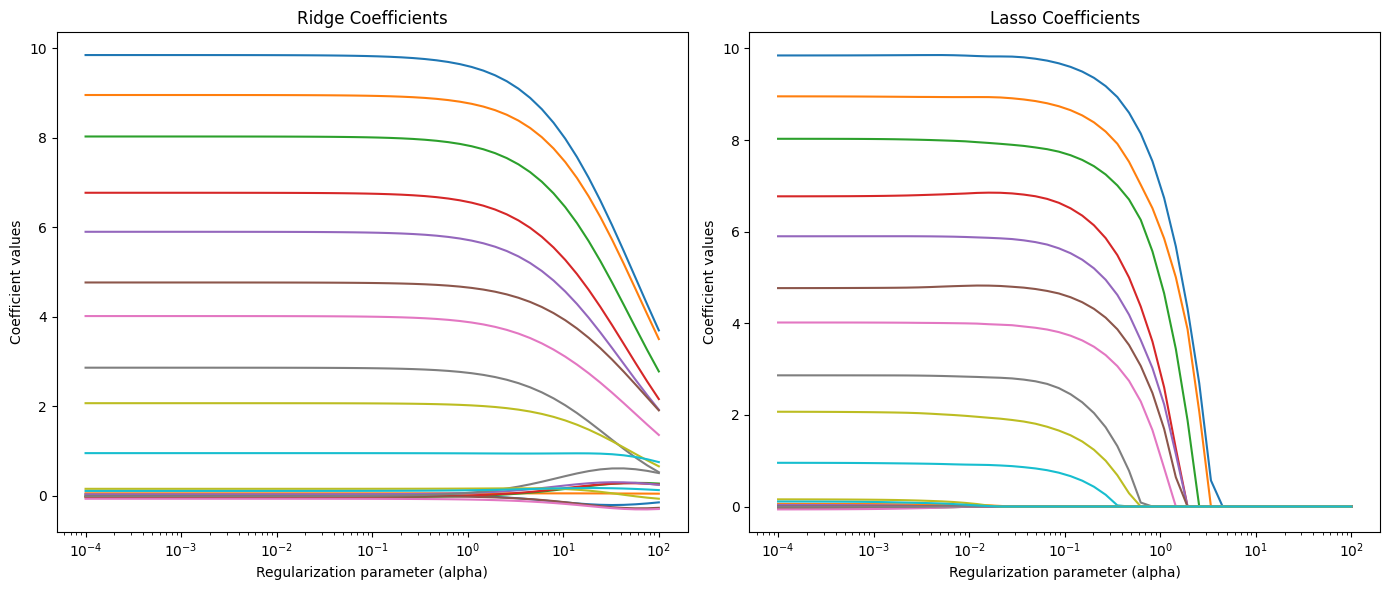

In [122]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming you already have the `ridge_coefs` and `lasso_coefs` lists from the previous steps
# and that `alphas` represents the regularization parameters.

# Create a figure with two subplots (1 row, 2 columns)
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot Ridge Coefficients on the first subplot
axes[0].plot(alphas, ridge_coefs)
axes[0].set_xscale('log')
axes[0].set_xlabel('Regularization parameter (alpha)')
axes[0].set_ylabel('Coefficient values')
axes[0].set_title('Ridge Coefficients')

# Plot Lasso Coefficients on the second subplot
axes[1].plot(alphas, lasso_coefs)
axes[1].set_xscale('log')  
axes[1].set_xlabel('Regularization parameter (alpha)')
axes[1].set_ylabel('Coefficient values')
axes[1].set_title('Lasso Coefficients')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


#### Ridge Coefficients Plot:

- As the regularization parameter (alpha) increases, the coefficients gradually shrink towards zero, **but all features remain in the model even at higher values of alpha.**

#### Lasso Coefficients Plot:

- In the Lasso plot, as the regularization parameter increases, many coefficients shrink to exactly zero.

In [ ]:
##### YOUR CODE ENDS ##### (please do not delete this line)

#### <font color='purple'>(b) What does Ridge regression do and what does Lasso regression do? How do they differ? </font>

**Answer:**
- Ridge regression shrinks the magnitude of the coefficients towards zero but does not make them exactly zero.
- Lasso shrinks some coefficients to exactly zero

## Task 6. Evaluating different models  (1 point)

#### <font color='purple'>(a) Choose the values of alpha for Ridge and Lasso according to subtask (4b). Now let's see which model works best for our data by evaluating the test RMSE. Compare the following models by reporting the training and testing set RMSE: </font>

1. Non-regularized linear regression
2. Ridge regression with your chosen parameter
3. Lasso regression with your chosen parameter
4. A "dumb" model that always predicts the mean value of y_train
5. An ideal model that the instructors have used for generating the data (the true coefficients are [10, 9, 8, 7, 6, 5, 4, 3, 2, 1, 0, 0, ..., 0] and intercept 0).

In [ ]:
##### YOUR CODE STARTS ##### (please do not delete this line)

In [123]:
from sklearn.preprocessing import StandardScaler

results = {}
X_train, X_test, y_train, y_test = train_test_split(
    data.iloc[:, 0:-1], data.iloc[:, -1], test_size=0.3, random_state=42
)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
y_train_pred = lr.predict(X_train_scaled)
y_test_pred = lr.predict(X_test_scaled)
results["Linear Regression"] = {
    "Train RMSE": np.sqrt(mean_squared_error(y_train, y_train_pred)),
    "Test RMSE": np.sqrt(mean_squared_error(y_test, y_test_pred)),
}

In [124]:
ridge_reg = Ridge(alpha=0.817273)
ridge_reg.fit(X_train_scaled, y_train)
y_train_pred = ridge_reg.predict(X_train_scaled)
y_test_pred = ridge_reg.predict(X_test_scaled)
results['Ridge Regression'] = {
    'Train RMSE': np.sqrt(mean_squared_error(y_train, y_train_pred)),
    'Test RMSE': np.sqrt(mean_squared_error(y_test, y_test_pred))
}

In [125]:
lasso_reg = Lasso(alpha=0.01)
lasso_reg.fit(X_train_scaled, y_train)
y_train_pred = lasso_reg.predict(X_train_scaled)
y_test_pred = lasso_reg.predict(X_test_scaled)
results['Lasso Regression'] = {
    'Train RMSE': np.sqrt(mean_squared_error(y_train, y_train_pred)),
    'Test RMSE': np.sqrt(mean_squared_error(y_test, y_test_pred))
}

In [126]:
y_train_mean = np.mean(y_train)
y_train_pred = np.full_like(y_train, y_train_mean)
y_test_pred = np.full_like(y_test, y_train_mean)
results['Dumb Model'] = {
    'Train RMSE': np.sqrt(mean_squared_error(y_train, y_train_pred)),
    'Test RMSE': np.sqrt(mean_squared_error(y_test, y_test_pred))
}

In [132]:
n_samples, n_features = 100, 99
true_coefs = np.array([10, 9, 8, 7, 6, 5, 4, 3, 2, 1] + [0]*(n_features-10))
y_train_pred = X_train.dot(true_coefs)
y_test_pred = X_test.dot(true_coefs)
results['Ideal Model'] = {
    'Train RMSE': np.sqrt(mean_squared_error(y_train, y_train_pred)),
    'Test RMSE': np.sqrt(mean_squared_error(y_test, y_test_pred))
}  

In [133]:
results_df = pd.DataFrame(results).T
display(results_df.sort_values(by='Test RMSE'))

,Train RMSE,Test RMSE
Ideal Model,0.580285,0.605362
Lasso Regression,0.322231,0.963658
Linear Regression,0.284608,1.186086
Ridge Regression,0.307472,1.206957
Dumb Model,11.313194,10.929878


In [ ]:
##### YOUR CODE ENDS ##### (please do not delete this line)

#### <font color='purple'>(b) Which method gives the best results and by looking at which value do you claim that? Why did this method work the best in your opinion?

**Answer:** 
1. Lasso Regression becasue it has the lowest test RMSE.
1. because it applies L1 regularization, which drive some coefficients to zero. This means Lasso effectively performs feature selection

#### <font color='purple'>(c) Were all of the "smart" models better than the "dumb" one (baseline). What would it mean if the learned model would give worse results?

**Answer:** Yes. That means there is a problem in the model (overfiting or underfiting) or the data has a poor quality.

#### <font color='purple'>(d) Were the learned models far from the ideal one? Were the learned coefficients similar to the true ones?

**Answer:** Yes.

#### <font color='purple'>(e) Which model overfitted the most, how can you see that?

**Answer:** i think no one overfitted the data

#### <font color='purple'>(f) Are regularized methods always better than methods without regularization (not only in this case but in general). Why/why not?

**Answer:** of course No, it depndes. Some times our problem is too complex so we need introduce some complixety to our model 

 ## <font color='red'>This was the last task! Please restart and run all before submission!</font>